### Знайомство з задачею

Колеги прислали дані з назвами колонок:  
<b>name</b>:&nbsp;&nbsp; назва мережі АЗС (зашифровано замість бренду назва рослини)  
<b>id</b>: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ідентифікатор самої заправки  
<b>date_time</b>:  &nbsp;&nbsp; дата заїзду на заправку  
<b>time_spent</b>: &nbsp;час перебування на заправці в секундах  

##### Треба відповісти на питання скільки часу тратять водії на заправку в кожній мережі АЗС.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/visits.csv', sep='\t') # separator is tab
data.head()

,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василёк
1,20180404T173913,76144fb2,15.0,Василёк
2,20180403T172824,76144fb2,220.0,Василёк
3,20180407T070441,76144fb2,19.0,Василёк
4,20180404T132049,76144fb2,14.0,Василёк


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317104 entries, 0 to 317103
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date_time   317104 non-null  object 
 1   id          317104 non-null  object 
 2   time_spent  317104 non-null  float64
 3   name        317104 non-null  object 
dtypes: float64(1), object(3)
memory usage: 9.7+ MB


В таблиці 317104 записи. Пропусків в даних нема. date_time потрібно переоприділити на формат дати.

In [4]:
data['date_time'] = pd.to_datetime(data['date_time'])   
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317104 entries, 0 to 317103
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date_time   317104 non-null  datetime64[ns]
 1   id          317104 non-null  object        
 2   time_spent  317104 non-null  float64       
 3   name        317104 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 9.7+ MB



Скільки часу тратять водії на заправку в кожній мережі АЗС. (секунд)

In [5]:
pivot = data.pivot_table(index='name', values='time_spent', aggfunc='mean').reset_index()
pivot.sort_values(by='time_spent')

,name,time_spent
31,Нарцисс,68.166758
3,Арктотис,73.879984
29,Малопа,76.070543
27,Лобулярия,96.834350
8,Белоцветник,100.818966
17,Годеция,113.958333
22,Колокольчик,119.131564
33,Незабудка,120.362398
1,Амарант,132.760012
42,Фасоль,133.631957


Цікаво як на заправках Малопа, Арктотис і Нарцис заправляють машини за 1 хвилину?  
Треба перевірити дані на достовіність.

In [6]:
total_visits = data['id'].count()
total_visits

np.int64(317104)

In [7]:
total_station = len(data['id'].unique())
total_station

471

За який період часу ми маємо дані?

In [8]:
data_min = data['date_time'].min()
data_max = data['date_time'].max()
data_min, data_max

(Timestamp('2018-04-02 00:00:08'), Timestamp('2018-04-08 23:59:57'))

In [9]:
days = (data_max - data_min)
days

Timedelta('6 days 23:59:49')

In [10]:
days = 7

In [11]:
station_visits_per_day = total_visits / days / total_station
station_visits_per_day

np.float64(96.17955717318775)

 ^^^^ ^^^^ ^^^^ ^^^^ \
 Маємо 96 заправок з ввімкненим навігатором в день на одну АЗС-станцію. \
 Припустимо, що одна заправочна станція може заправляти одночасно від 1 до 6 автомобілів. На заправку автомобіля йде від 1 до 5 хв. І я знаю, що вночі заправляється на багато меньше машин ніж вдень. \
 Беремо 2 авто за раз і 3 хвилини на заправку. 
 Маємо приблизно:  60 хвилин / 3 хв * 2 авто * 24 години = 960 заправок за добу \
 96 автомомбілів з ввімкненим навігатором (10%) здаються реальною цифрою


Подивомось скільки заправок приходитья на кожну мережу заправок

In [12]:
data_name = data['name'].value_counts().sort_values(ascending=False)
data_name.head(10)

name
Календула      85648
Василёк        79006
Георгина       34356
Немезия        20138
Колокольчик    18835
Мальва         17386
Гейхера        14125
Доротеантус     6312
Нарцисс         3640
Амарант         3221
Name: count, dtype: int64

 ^^^^ ^^^^ ^^^^ ^^^^ \
 Календула і Васільок є головними операторами ринку.\
\
Експерти підтвердили розподіл інших операторів як достовірний, тож вважаємо що з даними все добре. Але час заправки може бути порахований не вірно. 

In [13]:
data.time_spent.max()

np.float64(28925.0)

Максимально на заправку у одного водія пішло 8 годин. Повноцінний здоровий сон))  

Подивимось розподіл часу на графіку.

array([[<Axes: title={'center': 'time_spent'}>]], dtype=object)

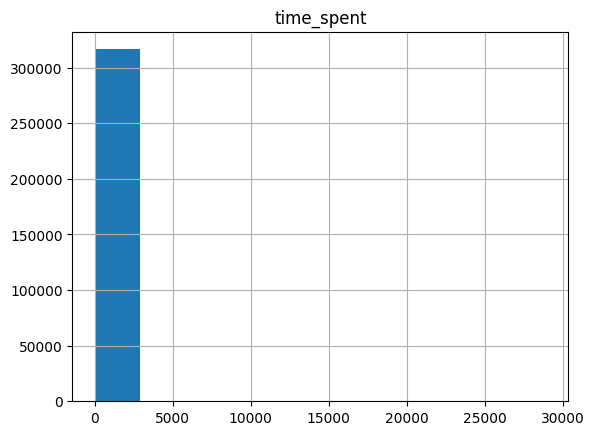

In [14]:
data.hist('time_spent')

По верхньому графіку нічого не зрозуміло. Добавимо більше стовпців у графіку.

array([[<Axes: title={'center': 'time_spent'}>]], dtype=object)

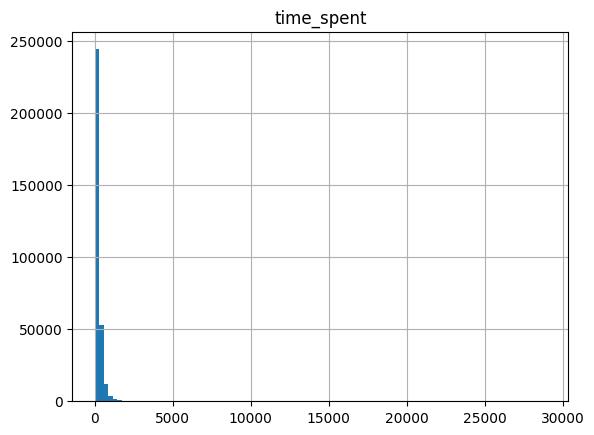

In [15]:
data.hist('time_spent', bins=100)

Обріжемо викиди на графіку до 1500.

array([[<Axes: title={'center': 'time_spent'}>]], dtype=object)

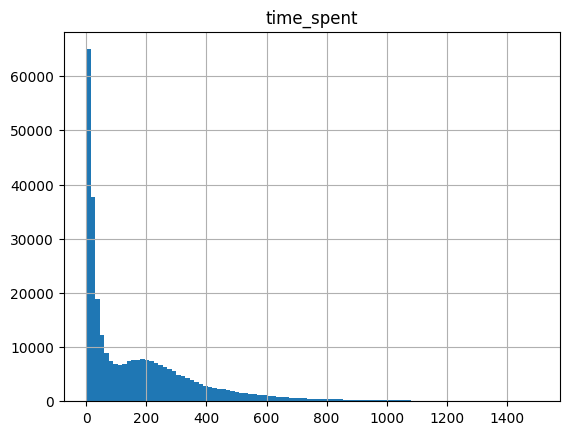

In [16]:

data.hist('time_spent', bins=100, range=(0, 1500))

Величезна кількість даних про час заправки, згрупована біля нуля. Такого бути не повинно.  
А також маємо викиди з великими значеннями. 

In [17]:
data.query('time_spent < 10').count()

date_time     43015
id            43015
time_spent    43015
name          43015
dtype: int64

In [18]:
data.query('time_spent > 1000').count()

date_time     6186
id            6186
time_spent    6186
name          6186
dtype: int64

Записів з заправкою довшою 1000 сек (16 хв) меньше чим з заправкою коротшою 10 секунд.  
Переглянемо спочатку довгі заправки. 


In [19]:
data.describe()

,date_time,time_spent
count,317104,317104.000000
mean,2018-04-05 13:35:49.178361088,203.382294
min,2018-04-02 00:00:08,0.000000
25%,2018-04-03 18:33:30.249999872,19.000000
50%,2018-04-05 14:38:10.500000,108.000000
75%,2018-04-07 07:56:25.750000128,274.000000
max,2018-04-08 23:59:57,28925.000000
std,NaN,395.754791


Медіанне значення часу заправки 108 секунд

(-100.0, 1500.0)

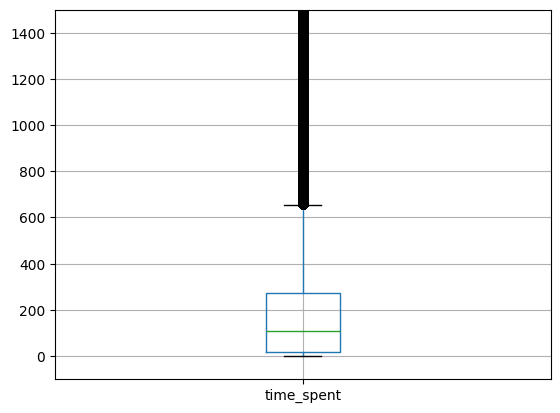

In [20]:
data.boxplot()
plt.ylim(-100, 1500) # limit the y-axis to see the boxplot better

Треба подивитись чи максимальний час на одній заправці, чи на різних. 

In [21]:
data.sort_values(by = 'time_spent', ascending = False).head(10)

,date_time,id,time_spent,name
114797,2018-04-02 05:57:08,3c1e4c52,28925.0,Василёк
27147,2018-04-06 08:02:54,4b5f2af5,28519.0,Немезия
60547,2018-04-08 00:00:02,cf1ba8a5,28292.0,Василёк
19042,2018-04-08 20:42:08,5410e876,23696.0,Василёк
118597,2018-04-08 16:50:20,3c1e4c52,21184.0,Василёк
118058,2018-04-02 11:13:33,3c1e4c52,20359.0,Василёк
114406,2018-04-08 08:37:22,3c1e4c52,19886.0,Василёк
132164,2018-04-05 16:07:45,627ea5e3,19445.0,Левкой
281360,2018-04-06 18:04:59,d0c0928d,18614.0,Пион
165326,2018-04-02 23:02:04,3af3bb71,18569.0,Агератум


Видно, що заправки різні і мережі заправок також різні.  
Часто на заправці "3c1e4c52" затримуються водії. Подивимось на неї більш детально.

In [22]:
sample = data.query('id == "3c1e4c52"')
sample.describe()

,date_time,time_spent
count,5814,5814.000000
mean,2018-04-05 15:19:19.396284672,572.186619
min,2018-04-02 00:01:06,0.000000
25%,2018-04-04 01:49:00,28.000000
50%,2018-04-05 15:45:47,167.000000
75%,2018-04-07 09:00:49.500000,402.750000
max,2018-04-08 23:48:04,28925.000000
std,NaN,1520.481520


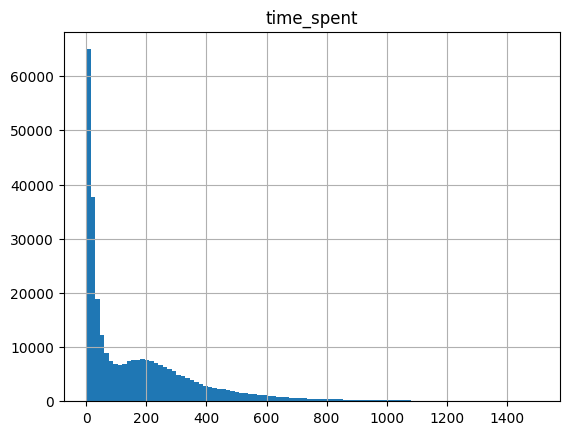

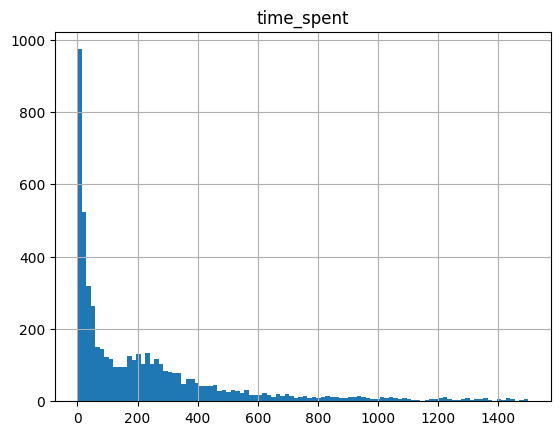

In [23]:
data.hist(column='time_spent', bins=100, range=(0, 1500))
plt.show()
sample.hist(column='time_spent', bins=100, range=(0, 1500))
plt.show() 

По графіках видно, що дані окремої заправки дуже схожі з даними всієї бази.  
Припускаю, що причина не тут.  
Подивимось на скільки багато довгих заправок в датасеті.

In [24]:
data.query('time_spent > 1000').count().iloc[0] / data.shape[0] * 100

np.float64(1.950779554972501)

Менше 2% тому можна їх видалити. Вони не будуть впливати на наші розрахунки. 

In [25]:
# data_cut = data.query('time_spent < 1000')
data_cut = data.loc[data['time_spent'] < 1000]

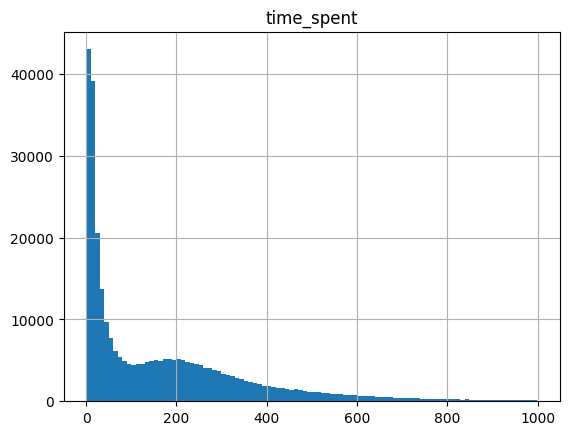

In [26]:
data_cut.hist(column='time_spent', bins=100)
plt.show()

В таблиці час позначений в UTC.  
 Добавлю колонку з локальним часом щоб подивитись розподіл заправок в залежності від часу доби.

In [27]:
data_cut.loc[:,'local_time'] = data_cut['date_time'] + pd.Timedelta(hours=2)
data_cut.head() 

,date_time,id,time_spent,name,local_time
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 18:53:58
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 19:39:13
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 19:28:24
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 09:04:41
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 15:20:49


Також для легшого майбутнього групування по годинам добавлю колонку з округленим часом до цілого.

In [28]:
data_cut.loc[:, 'date_hour'] = data_cut['local_time'].dt.round('h')
data_cut.head()

,date_time,id,time_spent,name,local_time,date_hour
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,2018-04-06 18:53:58,2018-04-06 19:00:00
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,2018-04-04 19:39:13,2018-04-04 20:00:00
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,2018-04-03 19:28:24,2018-04-03 19:00:00
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,2018-04-07 09:04:41,2018-04-07 09:00:00
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,2018-04-04 15:20:49,2018-04-04 15:00:00


Будуємо діаграму розсіювання(scatter plot) для змінних локального часу та часу заправки.

<Axes: xlabel='local_time'>

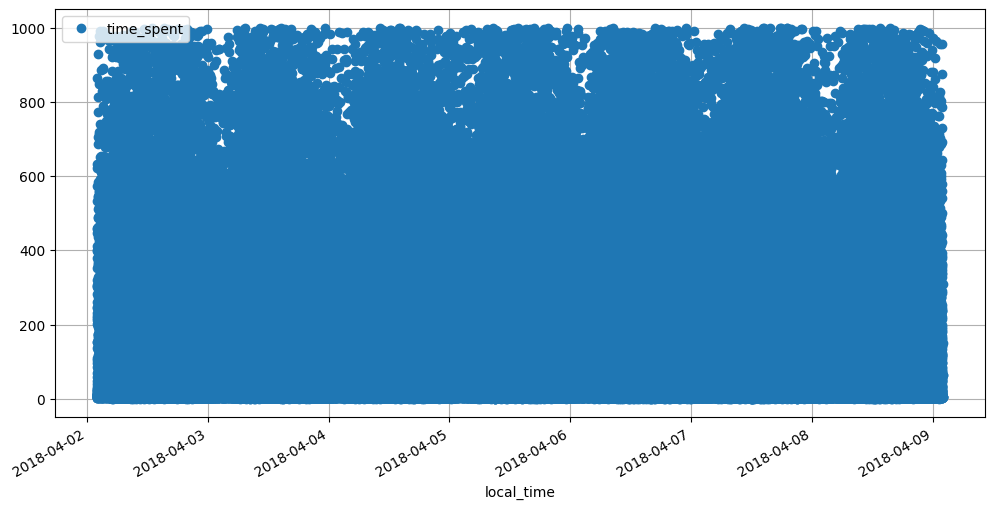

In [29]:
data_cut.plot(x='local_time', y='time_spent', style='o', figsize=(12, 6), grid=True)

По діаграмі нічого не видно через велику плотність даних. Візьмемо дані по заправці "3c1e4c52".  
Вони були схожі на дані загального датасету.

In [30]:
sample = data_cut.query('id == "3c1e4c52"')

<Axes: xlabel='local_time'>

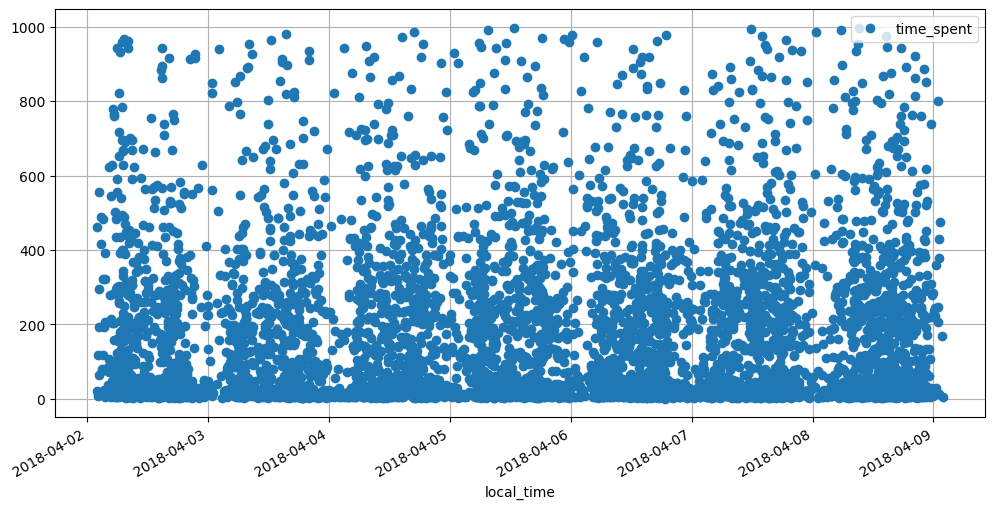

In [31]:
sample.plot(x='local_time', y='time_spent', style='o', figsize=(12, 6), grid=True)

На кордоні дат дані більш розріджені. Отже моя попередня гіпотеза, що вночі заправок меньше ніж вдень підтвердилась.  
Спробуємо більш детально подивитись на одну дату.

<Axes: title={'center': 'Час заправки кожним автомобілем на заправці 3c1e4c52 2018-04-03'}, xlabel='local_time'>

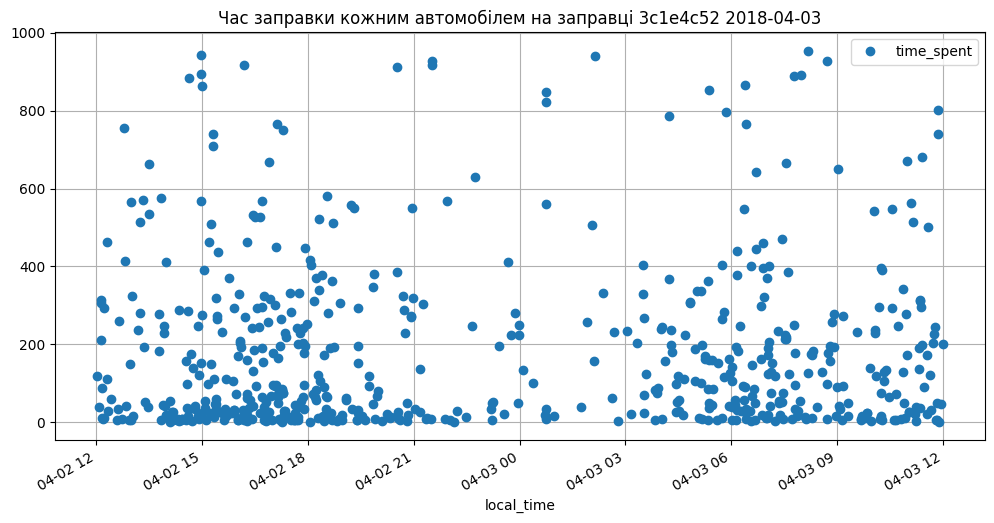

In [32]:
sample[sample['local_time'].dt.round('D') == '2018-04-03']\
    .plot(x='local_time', y='time_spent', style='o', figsize=(12, 6), grid=True, title='Час заправки кожним автомобілем на заправці 3c1e4c52 2018-04-03')

Подивимось на середній час заправки на протязі дня і кількість заправок.

<Axes: title={'center': 'Середній час відвідування станції 3c1e4c52 2018-04-03'}, xlabel='date_hour'>

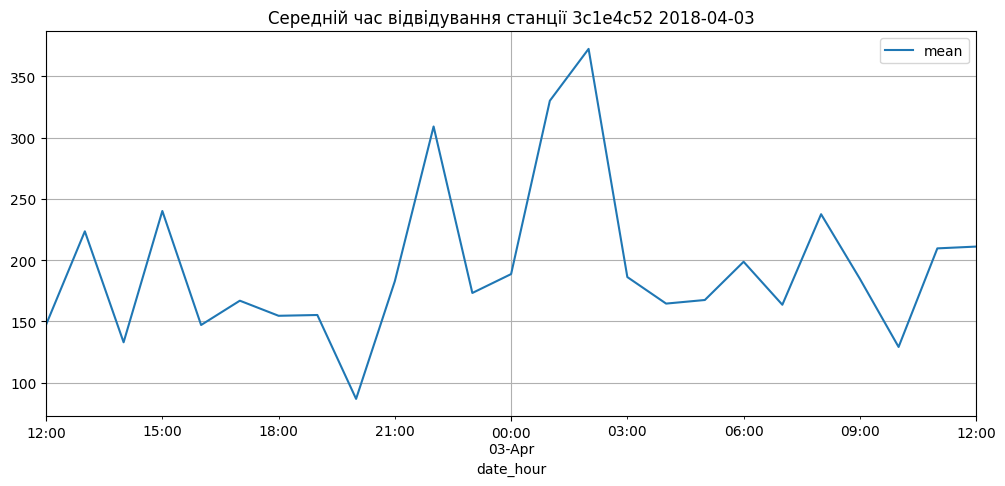

In [33]:
sample[sample['local_time'].dt.round('D') == '2018-04-03']\
    .pivot_table(index='date_hour', values='time_spent', aggfunc={'time_spent':['mean', 'count']}).reset_index()\
    .plot(x='date_hour', y='mean', grid=True, figsize=(12, 5), title='Середній час відвідування станції 3c1e4c52 2018-04-03')

<Axes: title={'center': 'Кількість заправок по годинам на станції 3c1e4c52 2018-04-03'}, xlabel='date_hour'>

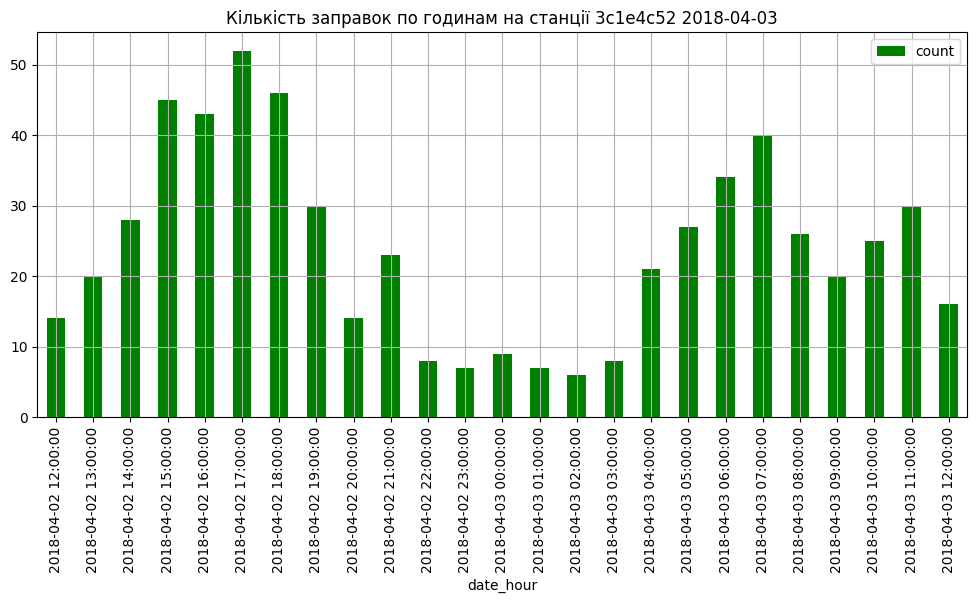

In [34]:
sample[sample['local_time'].dt.round('D') == '2018-04-03']\
    .pivot_table(index='date_hour', values='time_spent', aggfunc={'time_spent':['mean', 'count']}).reset_index()\
    .plot(x='date_hour', y='count', grid=True, figsize=(12, 5), color='green', kind='bar', title='Кількість заправок по годинам на станції 3c1e4c52 2018-04-03')

А якщо по всіх даних подивитись? Чи будуть схожі графіки?

<Axes: title={'center': 'Кількість заправок по годинам по всім станціям за 2018-04-03'}, xlabel='date_hour'>

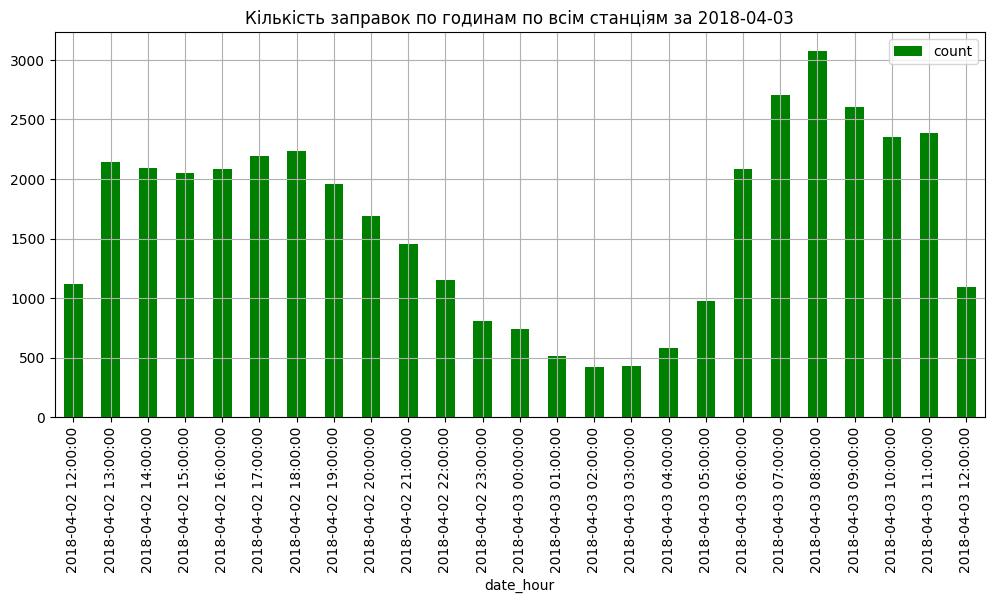

In [35]:
(
    data_cut[data_cut['local_time'].dt.round('D') == '2018-04-03']
    .pivot_table(
        index='date_hour', 
        values='time_spent', 
        aggfunc={'time_spent':['mean', 'count']})
    .reset_index()
    .plot(
        x='date_hour', 
        y='count', 
        grid=True, 
        figsize=(12, 5), 
        color='green', 
        kind='bar', 
        title='Кількість заправок по годинам по всім станціям за 2018-04-03')
)

<Axes: title={'center': 'Середній час заправок по всім станціям за 2018-04-03'}, xlabel='date_hour'>

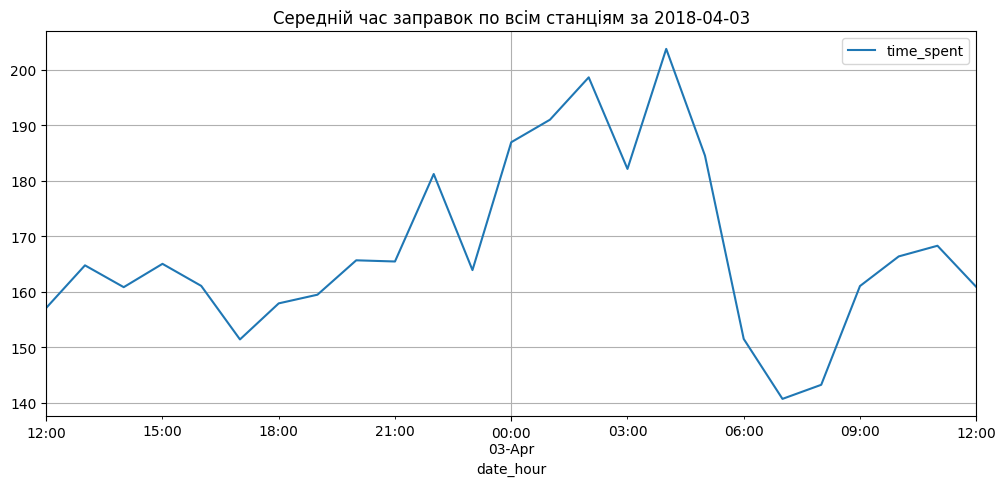

In [36]:
(
    data_cut[data_cut['local_time'].dt.round('D') == '2018-04-03']
    .pivot_table(
        index='date_hour', 
        values='time_spent')
    .plot(
        grid=True, 
        figsize=(12, 5), 
        title='Середній час заправок по всім станціям за 2018-04-03')
)

Середній час заправки в інші дні схожий?

<Axes: title={'center': 'Середній час заправок по всім станціям за весь період'}, xlabel='date_hour'>

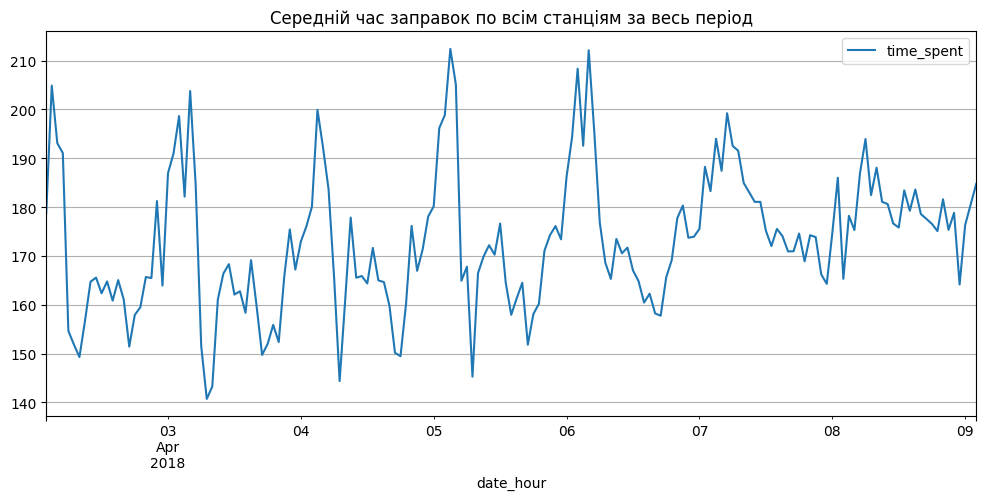

In [37]:
(
    data_cut.pivot_table(index='date_hour', values='time_spent')
    .plot(grid=True, figsize=(12, 5), title='Середній час заправок по всім станціям за весь період')
) 

<Axes: title={'center': 'Медіанний час заправок по всім станціям за весь період'}, xlabel='date_hour'>

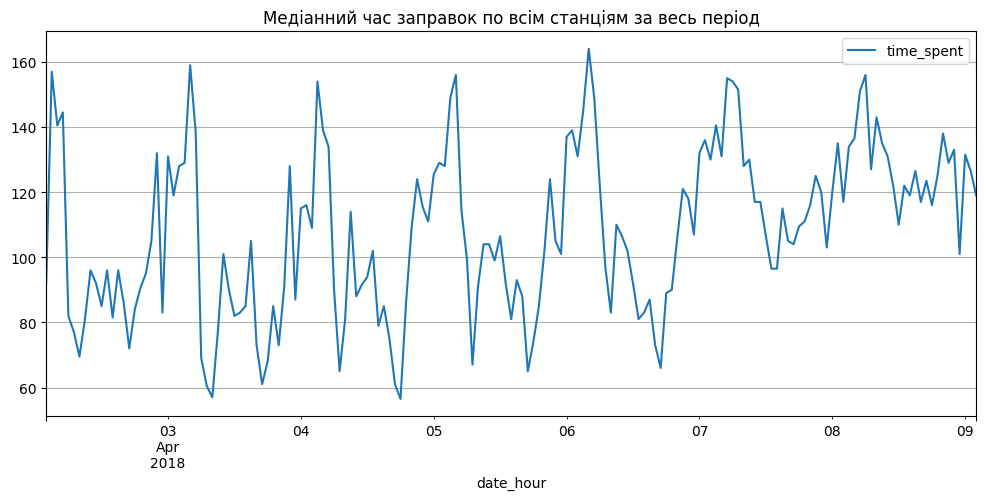

In [38]:
(
    data_cut.pivot_table(index='date_hour', values='time_spent', aggfunc='median')
    .plot(grid=True, figsize=(12, 5), title='Медіанний час заправок по всім станціям за весь період')
) 

<Axes: title={'center': 'Кількість заправок по годинам по всім станціям за весь період'}, xlabel='date_hour'>

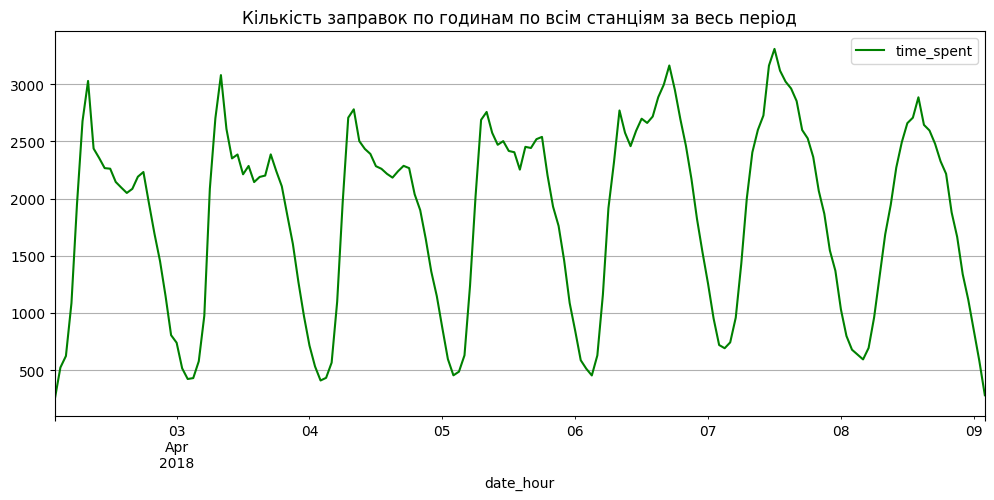

In [39]:
(
    data_cut.pivot_table(index='date_hour', values='time_spent', aggfunc='count')
    .plot(grid=True, figsize=(12, 5), color='green', title='Кількість заправок по годинам по всім станціям за весь період')
) 

Дивлячись на графік здається, що дані правильні. Вони відповідають здоровому глузду. Вранці заправаок найбільше, середня кількість в середині дня з неволиким підйомом в райні 16-18 годин. Вночі заправок дуже мало і середній час нічної заправки довший ніж в день. Здається все доволі логічним.  
Але заправки зі швидкістю менше 1 хв, досі непокоять.  

Порахую долю таких заправок в датасеті.

In [40]:

data['too_fast'] = data['time_spent'] < 60
data.head()

,date_time,id,time_spent,name,too_fast
0,2018-04-06 16:53:58,76144fb2,98.0,Василёк,False
1,2018-04-04 17:39:13,76144fb2,15.0,Василёк,True
2,2018-04-03 17:28:24,76144fb2,220.0,Василёк,False
3,2018-04-07 07:04:41,76144fb2,19.0,Василёк,True
4,2018-04-04 13:20:49,76144fb2,14.0,Василёк,True


In [41]:
data['too_fast'].mean()

np.float64(0.42213910893586964)

In [42]:
# the same as over
len(data.query('time_spent < 60')) / len(data) * 100

42.21391089358696

42 % просто дропнути не вийде)) 


Де найбільший відсоток швидких заправок?  
І це одна мережа чи різні?

In [43]:
data.pivot_table(index=['name','id'], values='too_fast', aggfunc='mean').sort_values(by='too_fast',ascending=False).head(10)

,,too_fast
name,id,
Астильба,c96c61cd,1.000000
Аммобиум,c527c306,1.000000
Василёк,5372547e,1.000000
Георгина,792b6ded,0.996253
Малопа,bd1d0bb0,0.982044
Георгина,4e50eaf1,0.968591
Незабудка,59612b4a,0.965854
Георгина,d987d054,0.959848
Василёк,272aee28,0.956757


array([[<Axes: title={'center': 'too_fast'}>]], dtype=object)

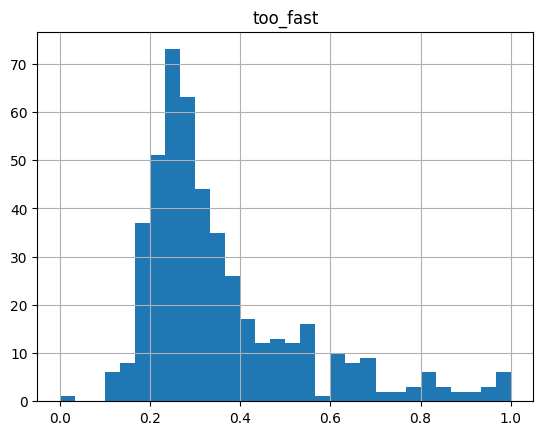

In [44]:
data.pivot_table(index='id', values='too_fast', aggfunc='mean').hist(bins=30)

Всі заправки різні, мережі заправок різні. В більшості станцій-АЗС дані з надшвидкою зарядкою займають 30%. Є дані по станції на якій 100% заправок менше хв.  
Подивимось ці заправки. 

In [45]:
data.pivot_table(index='id', values='too_fast', aggfunc='mean').sort_values(by='too_fast',ascending=False).head(10)

,too_fast
id,
c96c61cd,1.000000
c527c306,1.000000
5372547e,1.000000
792b6ded,0.996253
bd1d0bb0,0.982044
4e50eaf1,0.968591
59612b4a,0.965854
d987d054,0.959848
272aee28,0.956757


In [46]:
data.query('id == "c96c61cd"').describe()

,date_time,time_spent
count,1,1.0
mean,2018-04-02 13:42:21,5.0
min,2018-04-02 13:42:21,5.0
25%,2018-04-02 13:42:21,5.0
50%,2018-04-02 13:42:21,5.0
75%,2018-04-02 13:42:21,5.0
max,2018-04-02 13:42:21,5.0
std,NaN,NaN


Один запис нам ні про що не говорить зовсім. Пройдусь по кожній станції поки не знайду нормальну вибірку.

In [47]:
data.query('id == "792b6ded"').describe()

,date_time,time_spent
count,4270,4270.000000
mean,2018-04-05 10:57:51.492037376,5.448712
min,2018-04-02 00:21:51,0.000000
25%,2018-04-03 16:39:26.500000,2.000000
50%,2018-04-05 13:40:15,3.000000
75%,2018-04-06 20:58:21.500000,5.000000
max,2018-04-08 23:55:25,228.000000
std,NaN,8.597126


Ну ось 4270 записів і середній час заправки 5 секуд.  
Пишу колегам баг-репорт, що в данних 42% надшвидких заправок.   
І добавляю приклад з заправкою 792b6ded.  
Буду чекати відповіді. 